In [1]:
import pandas as pd
!pip install Bio
from Bio import SeqIO
from dataclasses import dataclass

In [2]:
import pandas as pd
import gffutils

In [26]:
gff3_file_path = 'chr20.gff3'
data = []
with open(gff3_file_path, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        parts = line.strip().split('\t')
        if len(parts) == 9:
            record = {
                'seqid': parts[0],
                'source': parts[1],
                'type': parts[2],
                'start': int(parts[3]),
                'end': int(parts[4]),
                'score': parts[5],
                'strand': parts[6],
                'phase': parts[7],
                'attributes': parts[8]
            }
            data.append(record)
df = pd.DataFrame(data)



In [27]:
print(df.head())

   seqid  source        type  start    end score strand phase  \
0  chr20  HAVANA        gene  87250  97094     .      +     .   
1  chr20  HAVANA  transcript  87250  97094     .      +     .   
2  chr20  HAVANA        exon  87250  87359     .      +     .   
3  chr20  HAVANA  transcript  87672  97094     .      +     .   
4  chr20  HAVANA        exon  87672  87767     .      +     .   

                                          attributes  
0  ID=ENSG00000178591.7;gene_id=ENSG00000178591.7...  
1  ID=ENST00000608838.1;Parent=ENSG00000178591.7;...  
2  ID=exon:ENST00000608838.1:1;Parent=ENST0000060...  
3  ID=ENST00000382410.3;Parent=ENSG00000178591.7;...  
4  ID=exon:ENST00000382410.3:1;Parent=ENST0000038...  


In [19]:
exon_df = df[df['type'] == 'exon']

exon_df['Parent'] = exon_df['attributes'].apply(lambda x: x.split('Parent=')[1].split(';')[0])

# Group by Parent  
intron_counts = exon_df.groupby('Parent').size().reset_index(name='count')
intron_counts['intron_count'] = intron_counts['count'] - 1

# intron_counts contains the number of introns for each Parent (transcript or gene)
print(intron_counts[['Parent', 'intron_count']])

                  Parent  intron_count
0      ENST00000262354.5             4
1      ENST00000269844.5            30
2      ENST00000270112.7            10
3      ENST00000270139.8            10
4     ENST00000270142.11             4
...                  ...           ...
3034   ENST00000684187.1             3
3035   ENST00000684327.1             2
3036   ENST00000684495.1             4
3037   ENST00000684541.1             4
3038   ENST00000684616.1             5

[3039 rows x 2 columns]


/var/folders/29/v4zr4r5s4l70_h06s1694q1m0000gn/T/ipykernel_22731/1429390031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exon_df['Parent'] = exon_df['attributes'].apply(lambda x: x.split('Parent=')[1].split(';')[0])


In [20]:
intron_counts['intron_count'].sum()

14932

False    36963
True     34275
Name: type, dtype: int64


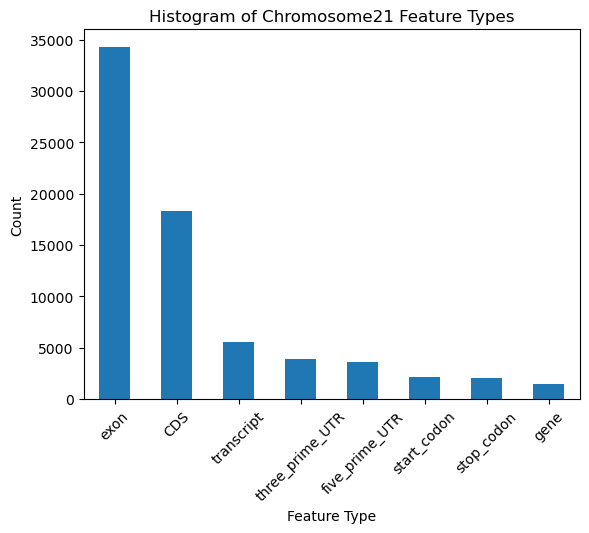

In [28]:
import matplotlib.pyplot as plt
type_counts = df['type'].value_counts()
print((df['type']=='exon').value_counts())
# Plot a histogram
type_counts.plot(kind='bar')
plt.title('Histogram of Chromosome21 Feature Types')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
df

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr21,HAVANA,gene,5011799,5017145,.,+,.,ID=ENSG00000279493.1;gene_id=ENSG00000279493.1...
1,chr21,HAVANA,transcript,5011799,5017145,.,+,.,ID=ENST00000624081.1;Parent=ENSG00000279493.1;...
2,chr21,HAVANA,exon,5011799,5011874,.,+,.,ID=exon:ENST00000624081.1:1;Parent=ENST0000062...
3,chr21,HAVANA,CDS,5011799,5011874,.,+,0,ID=CDS:ENST00000624081.1;Parent=ENST0000062408...
4,chr21,HAVANA,exon,5012548,5012687,.,+,.,ID=exon:ENST00000624081.1:2;Parent=ENST0000062...
...,...,...,...,...,...,...,...,...,...
35573,chr21,ENSEMBL,stop_codon,46664372,46664374,.,+,0,ID=stop_codon:ENST00000458387.6;Parent=ENST000...
35574,chr21,ENSEMBL,three_prime_UTR,46664375,46665117,.,+,.,ID=UTR3:ENST00000458387.6;Parent=ENST000004583...
35575,chr21,HAVANA,gene,46690764,46691226,.,+,.,ID=ENSG00000212932.3;gene_id=ENSG00000212932.3...
35576,chr21,HAVANA,transcript,46690764,46691226,.,+,.,ID=ENST00000427757.1;Parent=ENSG00000212932.3;...
